# CREB1 - upbm pipeline QC

In [1]:
library(tidyverse)
library(cowplot)
library(ggrepel)
library(readxl)
library(upbm)
library(upbmAux)
theme_set(theme_bw())

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuan

### functions

In [2]:
panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- abs(cor(x, y))
    txt <- format(c(r, 0.123456789), digits = digits)[1]
    txt <- paste0(prefix, txt)
    if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = cex.cor * r * 10)
}

## variables

In [4]:
tf <- "CREB1"

motif <- "CGTCA"
rc_motif <- "TGACG"

ref_condition <- "CREB1-ref"

datdir <- "../../../../data/internal/pbms/gpr_files"
sampdir <- "../../../../data/internal/pbms/samp_sheets"

## 1. load sample sheet

In [9]:
alexa_samples <- read_csv(file.path(sampdir, paste0(tf, "-alexa.csv")), col_types = cols())
alexa_samples

New names:
• `` -> `...1`


...1 date   id  reuse type  pmt lp  idx condition
1   0   230411 447 1     Alexa 400 100 1   CREB1-alt
2   1   230411 447 1     Alexa 500 100 1   CREB1-alt
3   2   230411 447 1     Alexa 600 100 1   CREB1-alt
4   3   230411 447 1     Alexa 400 100 4   CREB1-ref
5   4   230411 447 1     Alexa 500 100 4   CREB1-ref
6   5   230411 447 1     Alexa 600 100 4   CREB1-ref
7   6   230413 448 1     Alexa 400 100 6   CREB1-alt
8   7   230413 448 1     Alexa 500 100 6   CREB1-alt
9   8   230413 448 1     Alexa 600 100 6   CREB1-alt
10  9   230413 448 1     Alexa 400 100 7   CREB1-ref
11 10   230413 448 1     Alexa 500 100 7   CREB1-ref
12 11   230413 448 1     Alexa 600 100 7   CREB1-ref
13 12   230511 459 1     Alexa 400 100 2   CREB1-alt
14 13   230511 459 1     Alexa 500 100 2   CREB1-alt
15 14   230511 459 1     Alexa 600 100 2   CREB1-alt
16 15   230511 459 1     Alexa 400 100 8   CREB1-ref
17 16   230511 459 1     Alexa 500 100 8   CREB1-ref
18 17   230511 459 1     Alexa 600 100 8   CREB1-ref
19 18   230519 462 1     Alexa 400 100 6   CREB1-ref
20 19   230519 462 1     Alexa 500 100 6   CREB1-ref
21 20   230519 462 1     Alexa 600 100 6   CREB1-ref
22 21   230519 462 1     Alexa 400 100 2   CREB1-alt
23 22   230519 462 1     Alexa 500 100 2   CREB1-alt
24 23   230519 462 1     Alexa 600 100 2   CREB1-alt
25 24   230601 455 1     Alexa 400 100 6   CREB1-alt
26 25   230601 455 1     Alexa 500 100 6   CREB1-alt
27 26   230601 455 1     Alexa 600 100 6   CREB1-alt
28 27   230601 455 1     Alexa 400 100 7   CREB1-ref
29 28   230601 455 1     Alexa 500 100 7   CREB1-ref
30 29   230601 455 1     Alexa 600 100 7   CREB1-ref
   gpr                                                                                                                                               
1  230411_v14_447_1_CREB1-ref_FOXA1-4aa_FOXA1-N3wing_CREB1-alt_FOXA1-S188G_FOXA1-ref_LHX9-A01_FOXA1-N3wing-4aa_Alexa488_lp400pg100_1-8.gpr           
2  230411_v14_447_1_CREB1-ref_FOXA1-4aa_FOXA1-N3wing_CREB1-alt_FOXA1-S188G_FOXA1-ref_LHX9-A01_FOXA1-N3wing-4aa_Alexa488_lp500pg100_1-8.gpr           
3  230411_v14_447_1_CREB1-ref_FOXA1-4aa_FOXA1-N3wing_CREB1-alt_FOXA1-S188G_FOXA1-ref_LHX9-A01_FOXA1-N3wing-4aa_Alexa488_lp600pg100_1-8.gpr           
4  230411_v14_447_1_CREB1-ref_FOXA1-4aa_FOXA1-N3wing_CREB1-alt_FOXA1-S188G_FOXA1-ref_LHX9-A01_FOXA1-N3wing-4aa_Alexa488_lp400pg100_4-8.gpr           
5  230411_v14_447_1_CREB1-ref_FOXA1-4aa_FOXA1-N3wing_CREB1-alt_FOXA1-S188G_FOXA1-ref_LHX9-A01_FOXA1-N3wing-4aa_Alexa488_lp500pg100_4-8.gpr           
6  230411_v14_447_1_CREB1-ref_FOXA1-4aa_FOXA1-N3wing_CREB1-alt_FOXA1-S188G_FOXA1-ref_LHX9-A01_FOXA1-N3wing-4aa_Alexa488_lp600pg100_4-8.gpr           
7  230413_v14_448_1_FOXN2-T151A_FOXN3-ref_FOXN2-ref_FOXN2-T151N_FOXN2-K179E_CREB1-ref_CREB1-alt_FOXN3-A2loop-short_Alexa488_lp400pg100_6-8.gpr       
8  230413_v14_448_1_FOXN2-T151A_FOXN3-ref_FOXN2-ref_FOXN2-T151N_FOXN2-K179E_CREB1-ref_CREB1-alt_FOXN3-A2loop-short_Alexa488_lp500pg100_6-8.gpr       
9  230413_v14_448_1_FOXN2-T151A_FOXN3-ref_FOXN2-ref_FOXN2-T151N_FOXN2-K179E_CREB1-ref_CREB1-alt_FOXN3-A2loop-short_Alexa488_lp600pg100_6-8.gpr       
10 230413_v14_448_1_FOXN2-T151A_FOXN3-ref_FOXN2-ref_FOXN2-T151N_FOXN2-K179E_CREB1-ref_CREB1-alt_FOXN3-A2loop-short_Alexa488_lp400pg100_7-8.gpr       
11 230413_v14_448_1_FOXN2-T151A_FOXN3-ref_FOXN2-ref_FOXN2-T151N_FOXN2-K179E_CREB1-ref_CREB1-alt_FOXN3-A2loop-short_Alexa488_lp500pg100_7-8.gpr       
12 230413_v14_448_1_FOXN2-T151A_FOXN3-ref_FOXN2-ref_FOXN2-T151N_FOXN2-K179E_CREB1-ref_CREB1-alt_FOXN3-A2loop-short_Alexa488_lp600pg100_7-8.gpr       
13 230511_v14_459_1_LHX9C10-Ref_CREB1-100866_TBX5C05-Ref_LHX9-101201_TBX5B05_LHX9-100401_TBX5A05_CREB1-100217_Alexa488_lp400pg100_2-8.gpr            
14 230511_v14_459_1_LHX9C10-Ref_CREB1-100866_TBX5C05-Ref_LHX9-101201_TBX5B05_LHX9-100401_TBX5A05_CREB1-100217_Alexa488_lp500pg100_2-8.gpr            
15 230511_v14_459_1_LHX9C10-Ref_CREB1-100866_TBX5C05-Ref_LHX9-101201_TBX5B05_LHX9-100401_TBX5A05_CREB1-100217_

In [10]:
cy3_samples <- read_csv(file.path(sampdir, paste0(tf, "-cy3.csv")), col_types = cols())
cy3_samples

New names:
• `` -> `...1`


...1 date   id  type  pmt lp  idx
1   0   230410 447 Alexa 500 100 1  
2   3   230410 447 Alexa 500 100 4  
3  13   230412 448 Alexa 500 100 6  
4  14   230412 448 Alexa 500 100 7  
5  16   230511 459 Alexa 500 100 2  
6  17   230511 459 Alexa 500 100 8  
7  18   230517 462 Alexa 500 100 2  
8  19   230517 462 Alexa 500 100 6  
9  20   230531 455 Alexa 500 100 6  
10 21   230531 455 Alexa 500 100 7  
   gpr                                                  id_idx
1  230410_v14_447_doublestranded_Cy3_lp500pg100_1-8.gpr 447_1 
2  230410_v14_447_doublestranded_Cy3_lp500pg100_4-8.gpr 447_4 
3  230412_v14_448_doublestranded_Cy3_lp500pg100_6-8.gpr 448_6 
4  230412_v14_448_doublestranded_Cy3_lp500pg100_7-8.gpr 448_7 
5  230510_v14_459_doublestranded_Cy3_lp500pg100_2-8.gpr 459_2 
6  230510_v14_459_doublestranded_Cy3_lp500pg100_8-8.gpr 459_8 
7  230517_v14_462_doublestranded_Cy3_lp500pg100_2-8.gpr 462_2 
8  230517_v14_462_doublestranded_Cy3_lp500pg100_6-8.gpr 462_6 
9  230531_v14_455_doublestranded_Cy3_lp500pg100_6-8.gpr 455_6 
10 230531_v14_455_doublestranded_Cy3_lp500pg100_6-8.gpr 455_7

In [11]:
# properly prefix file paths for data
alexa_samples <- dplyr::mutate(alexa_samples, gpr = file.path(datdir, gpr))
cy3_samples <- dplyr::mutate(cy3_samples, gpr = file.path(datdir, gpr))

## 2. load data

In [12]:
tf_a <- gpr2PBMExperiment(alexa_samples, probes = pbm_8x60k_v1)
tf_c <- gpr2PBMExperiment(cy3_samples, probes = pbm_8x60k_v1)

## 3. QC: # saturated probes at each PMT gain

In [13]:
tf_a_df <- broom::tidy(tf_a, long = TRUE) 
tf_c_df <- broom::tidy(tf_c, long = TRUE) 

In [14]:
tf_a_df %>%
    dplyr::group_by(id, condition, pmt) %>%
    dplyr::summarize(nsat = sum(log2(fore) > 15.5 |
                                log2(fore) < 4, na.rm = TRUE)) %>%
    dplyr::ungroup() %>%
    tidyr::spread(pmt, nsat) %>%
    print(n = 50)

`summarise()` has grouped output by 'id', 'condition'. You can override using
the `.groups` argument.


# A tibble: 10 × 5
      id condition `400` `500` `600`
   <dbl> <chr>     <int> <int> <int>
 1   447 CREB1-alt     0     3    13
 2   447 CREB1-ref     0     3     6
 3   448 CREB1-alt     0     3     9
 4   448 CREB1-ref     0     3     6
 5   455 CREB1-alt     0     4    25
 6   455 CREB1-ref     0     4    16
 7   459 CREB1-alt     0     0     3
 8   459 CREB1-ref     0     4    18
 9   462 CREB1-alt     0     0   315
10   462 CREB1-ref     0     3    11


In [15]:
chosen_pmt <- 500

### also check number of NA probes

In [16]:
tf_a_df %>%
    dplyr::group_by(id, condition, pmt) %>%
    dplyr::summarize(nna = sum(is.na(fore))) %>%
    dplyr::ungroup() %>%
    tidyr::spread(pmt, nna) %>%
    print(n = 50)

`summarise()` has grouped output by 'id', 'condition'. You can override using
the `.groups` argument.


# A tibble: 10 × 5
      id condition `400` `500` `600`
   <dbl> <chr>     <int> <int> <int>
 1   447 CREB1-alt     0     0     0
 2   447 CREB1-ref     0     0     0
 3   448 CREB1-alt     0     0     0
 4   448 CREB1-ref     0     0     0
 5   455 CREB1-alt     0     0     0
 6   455 CREB1-ref     0     0     0
 7   459 CREB1-alt     0     0     0
 8   459 CREB1-ref     0     0     0
 9   462 CREB1-alt     0     0     0
10   462 CREB1-ref     0     0     0


## 4. QC: distribution of probe intensities at PMT gains

In [17]:
options(repr.plot.width=10, repr.plot.height=8)

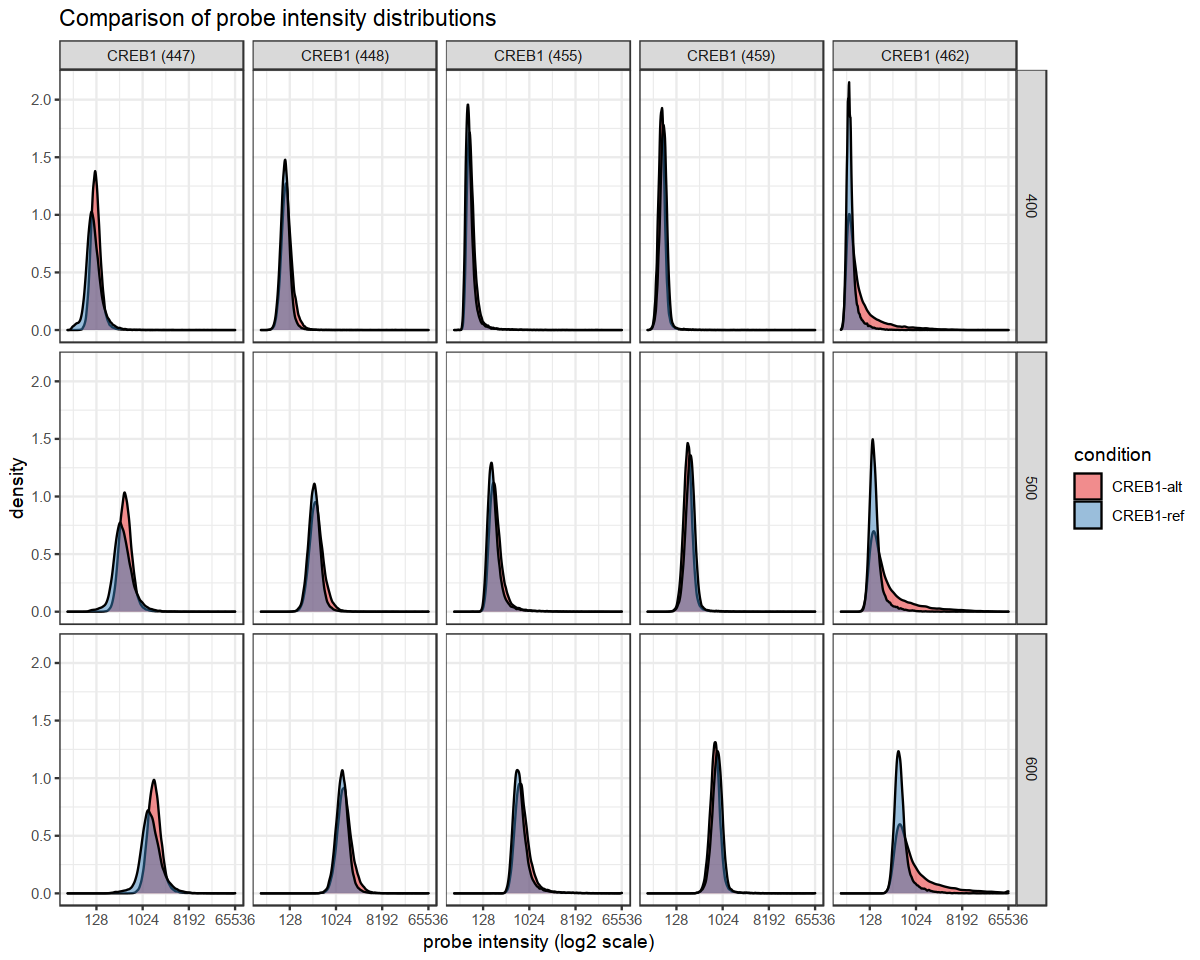

In [18]:
tf_a_df %>%
    dplyr::filter(pmt > 300) %>%
    dplyr::mutate(tf = paste0(tf, " (", id, ")")) %>%
    ggplot(aes(x = fore)) +
    geom_density(aes(fill = condition), alpha = 1/2) +
    facet_grid(pmt ~ tf) +
    scale_fill_brewer(palette = "Set1") + 
    scale_x_continuous("probe intensity (log2 scale)", trans = "log2") +
    ggtitle("Comparison of probe intensity distributions")

## 5. QC: spatial trends of probe intensities at PMT gains

### alexa

In [19]:
options(repr.plot.width=16, repr.plot.height=8)

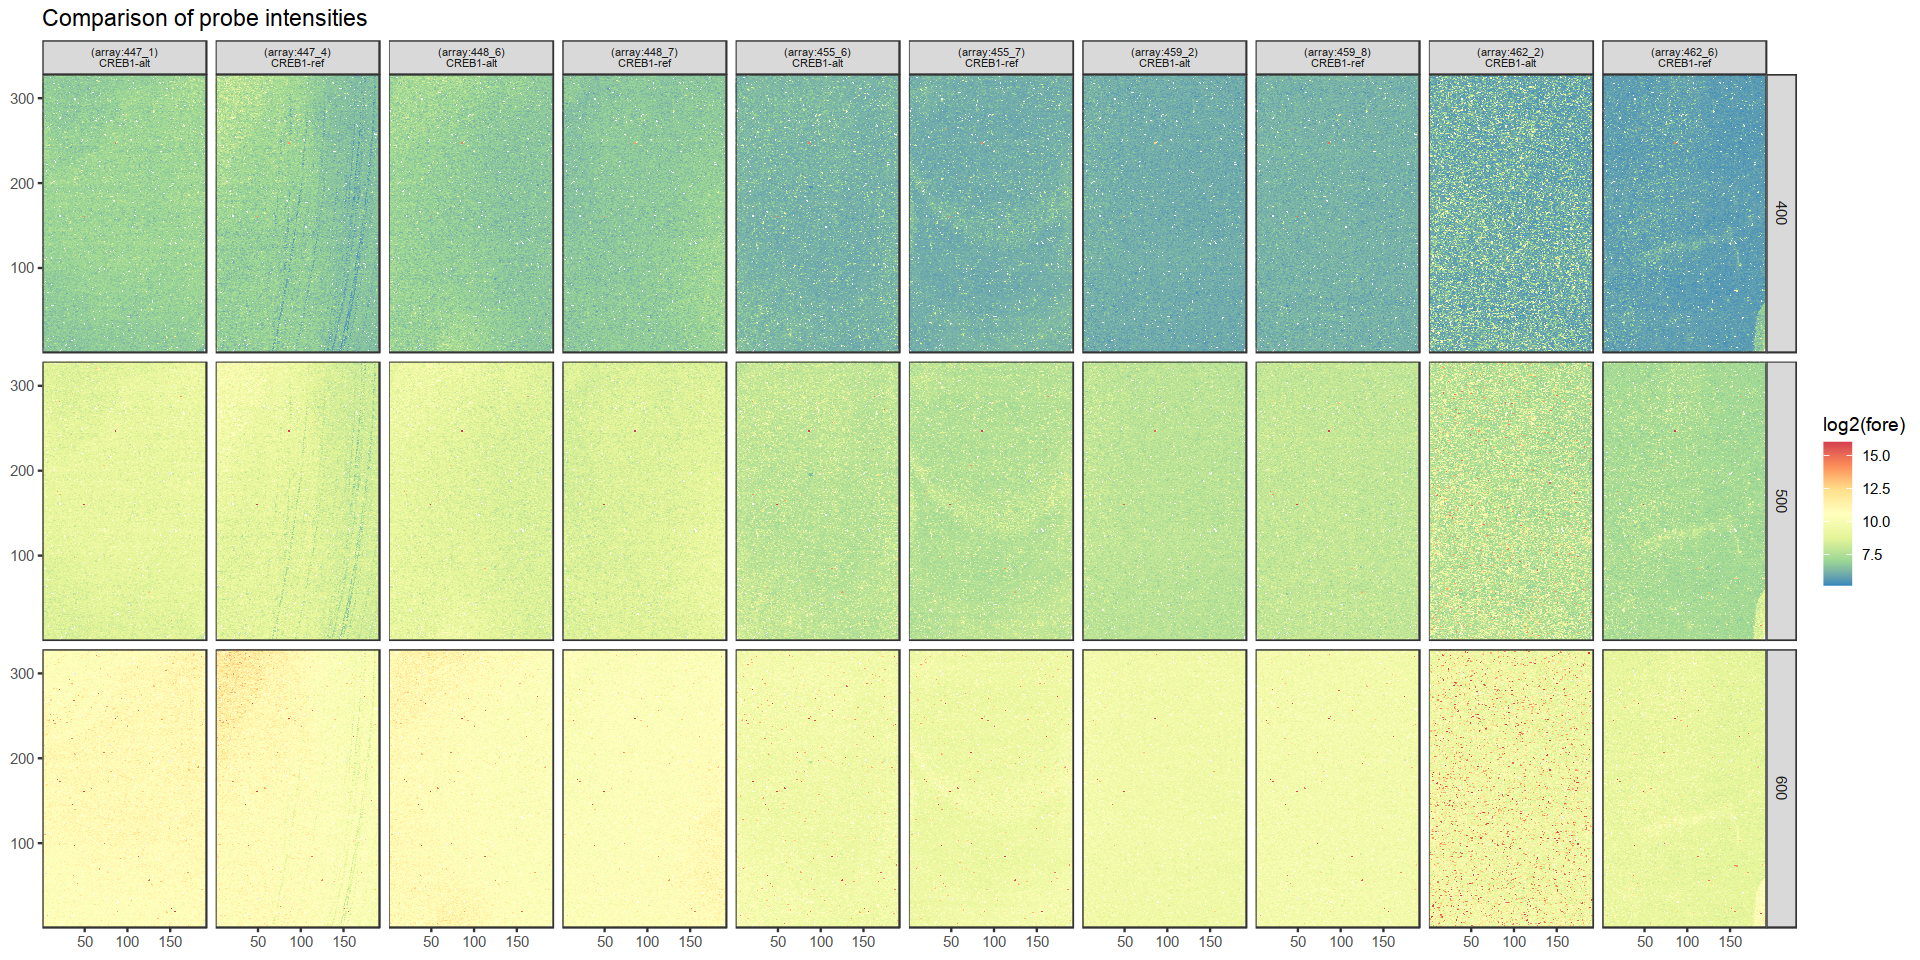

In [20]:
tf_a_df %>%
    dplyr::filter(pmt > 300) %>%
    dplyr::mutate(condition = paste0("(array:", id_idx, ")\n", condition)) %>%
    ggplot(aes(x = Column, y = Row, fill = log2(fore))) +
    geom_tile() +
    scale_fill_distiller(palette = "Spectral") +
    scale_x_continuous(NULL, expand = c(0, 0)) +
    scale_y_continuous(NULL, expand = c(0, 0)) +
    facet_grid(pmt ~ condition) +
    ggtitle("Comparison of probe intensities") +
    theme(strip.text.x = element_text(size = 6))

### cy3

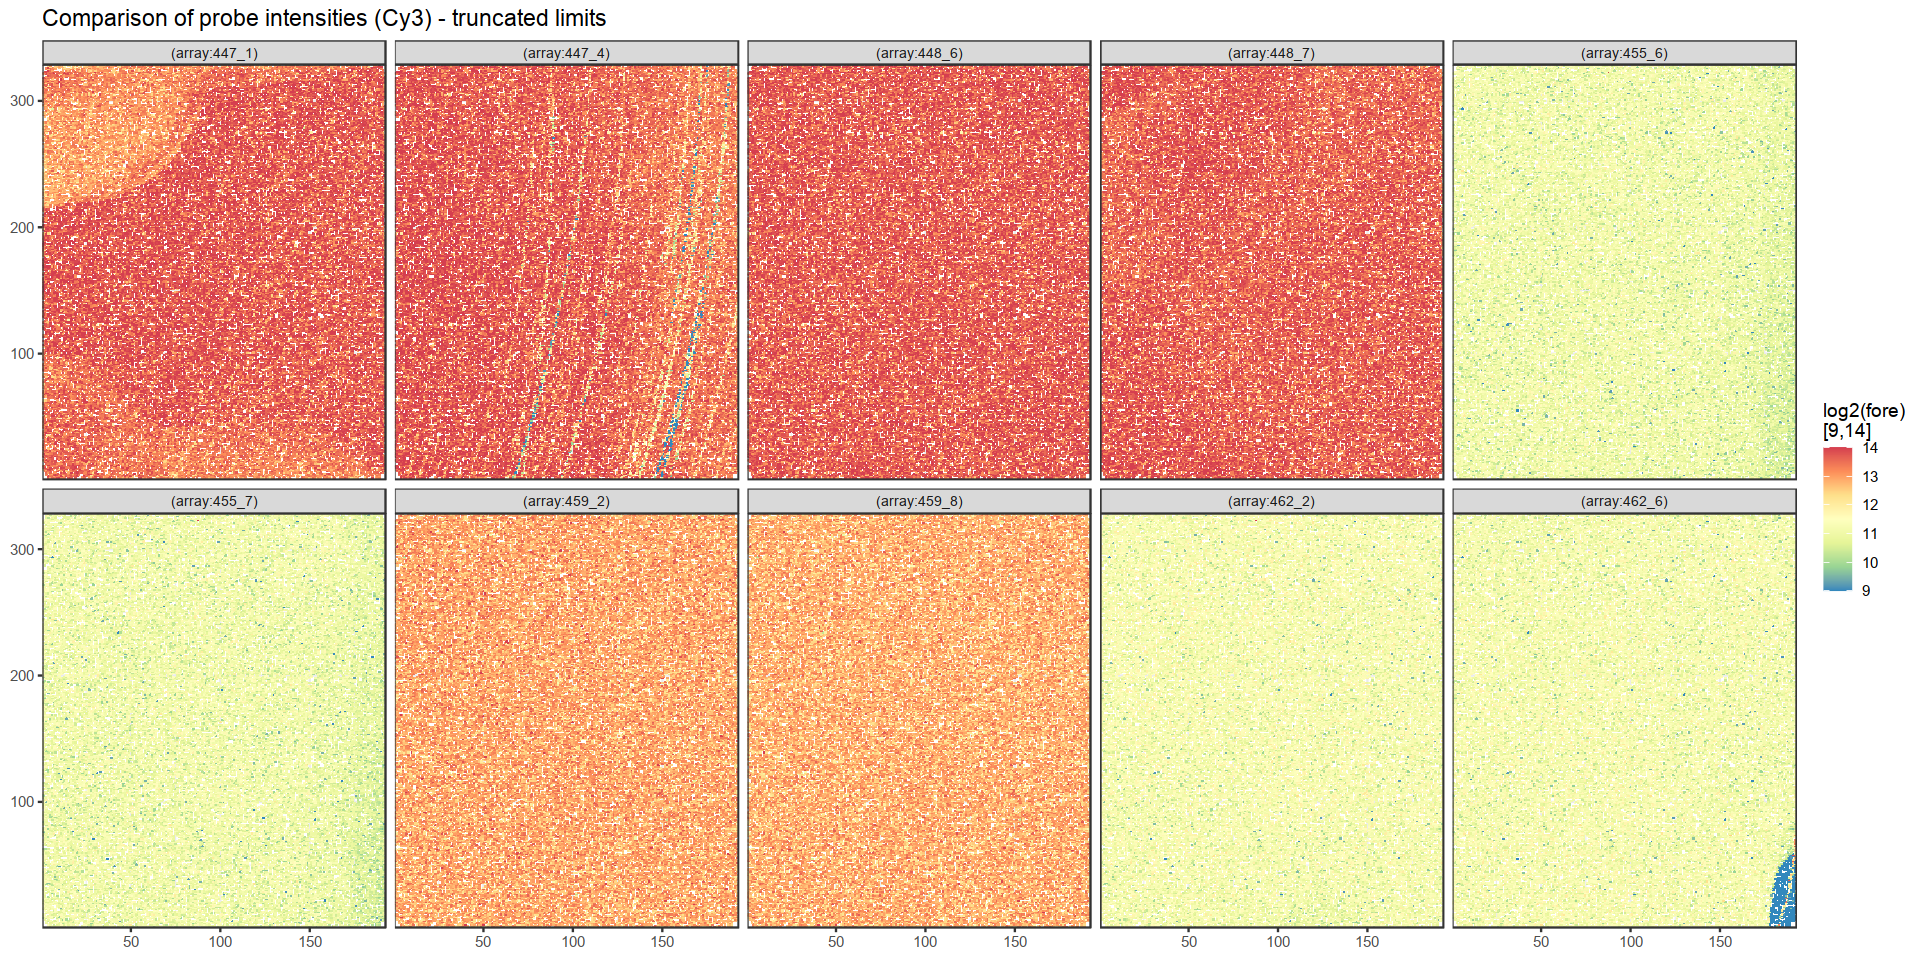

In [21]:
tf_c_df %>%
    dplyr::mutate(fore = scales::squish(fore, range = c(2^9, 2^14))) %>%
    dplyr::mutate(condition = paste0("(array:", id_idx, ")")) %>%
    ggplot(aes(x = Column, y = Row, fill = log2(fore))) +
    geom_tile() +
    scale_fill_distiller("log2(fore)\n[9,14]", palette = "Spectral") +
    scale_x_continuous(NULL, expand = c(0, 0)) +
    scale_y_continuous(NULL, expand = c(0, 0)) +
    facet_wrap(~ condition, nrow = 2) +
    ggtitle("Comparison of probe intensities (Cy3) - truncated limits") +
    theme(strip.text.x = element_text(size = 8))

## 6. QC: comparisons across replicates (probe level)

In [23]:
options(repr.plot.width=8, repr.plot.height=8)

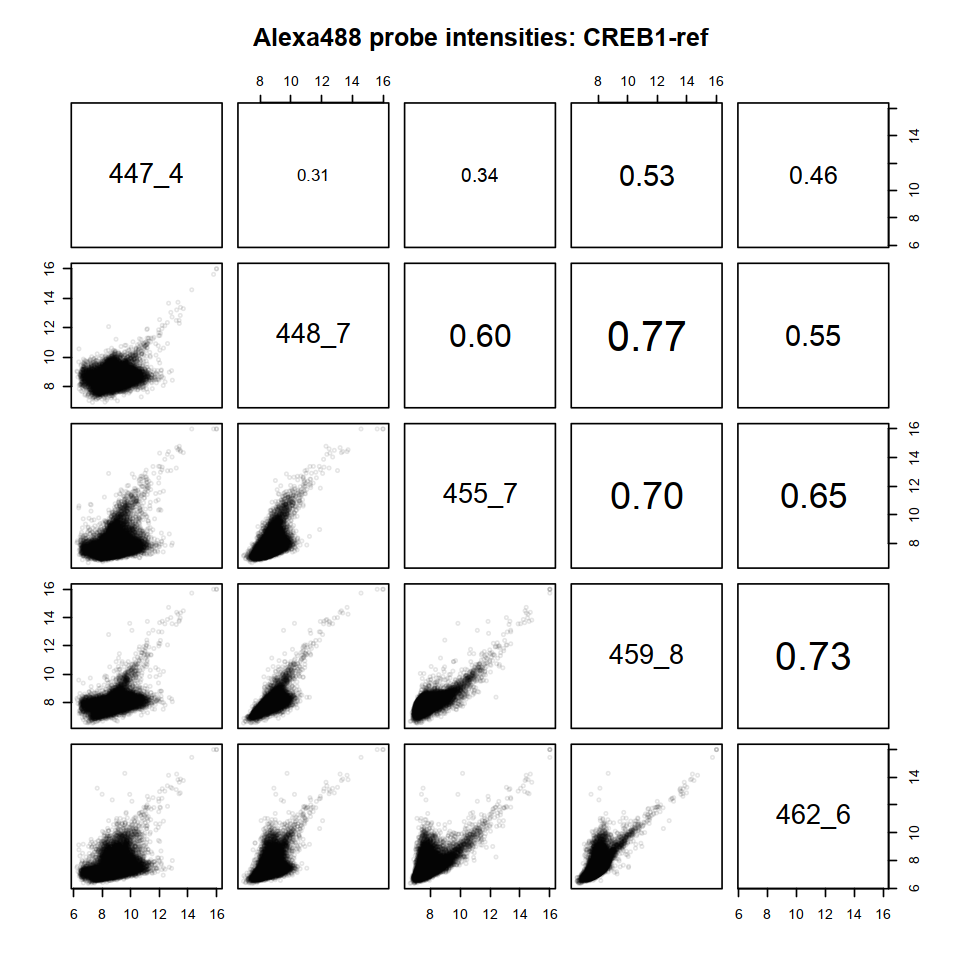

In [24]:
tf_a_df %>%
    dplyr::filter(pmt == chosen_pmt) %>%
    dplyr::filter(condition == "CREB1-ref") %>%
    dplyr::select(Column, Row, condition, id_idx, fore) %>%
    dplyr::mutate(fore=log2(fore)) %>%
    tidyr::spread(id_idx, fore) %>%
    dplyr::select(-Column, -Row, -condition) %>%
    as.matrix() %>%
    pairs(col = rgb(0, 0, 0, 1/10), cex = .4, upper.panel = panel.cor,
          main = "Alexa488 probe intensities: CREB1-ref")

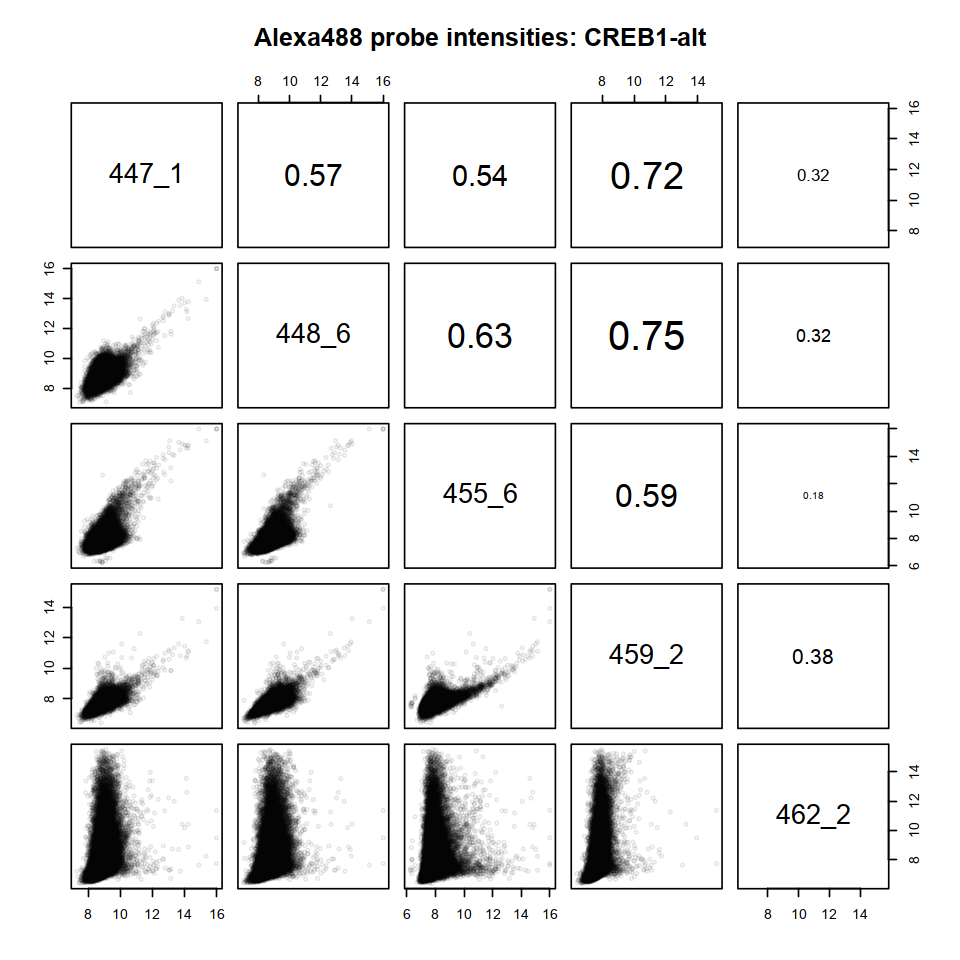

In [25]:
tf_a_df %>%
    dplyr::filter(pmt == chosen_pmt) %>%
    dplyr::filter(condition == "CREB1-alt") %>%
    dplyr::select(Column, Row, condition, id_idx, fore) %>%
    dplyr::mutate(fore=log2(fore)) %>%
    tidyr::spread(id_idx, fore) %>%
    dplyr::select(-Column, -Row, -condition) %>%
    as.matrix() %>%
    pairs(col = rgb(0, 0, 0, 1/10), cex = .4, upper.panel = panel.cor,
          main = "Alexa488 probe intensities: CREB1-alt")

## 7. perform preprocessing to run inference (differential affinity)

### select PMT gain / filter out any bad or spillover chambers

In [26]:
tf_a_pmt <- tf_a[, colData(tf_a)$pmt == chosen_pmt]

# given that array 462_2 has generally low probe-level correlations, filter out
tf_a_pmt <- tf_a_pmt[, colData(tf_a_pmt)$id_idx != "462_2"]

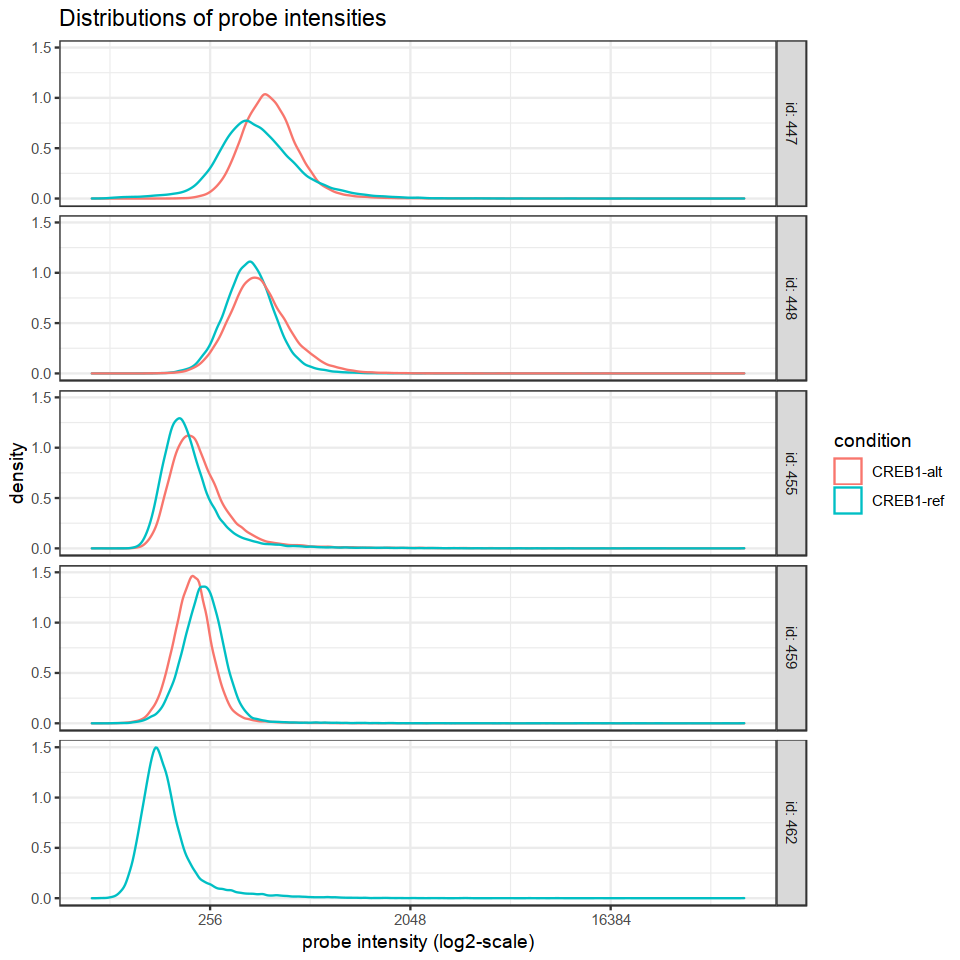

In [27]:
tf_a2 <- broom::tidy(tf_a_pmt, "fore", long = TRUE)

ggplot(tf_a2, aes(x = fore, group = cname, color = condition)) +
    geom_density() +
    scale_x_continuous("probe intensity (log2-scale)", trans = "log2") + 
    facet_grid(id ~ ., labeller = label_both) + 
    theme_bw() +
    ggtitle("Distributions of probe intensities")

### background-subtract probe intensities

In [28]:
tf_a_pmt <- backgroundSubtract(tf_a_pmt, assay = "fore", assayb = "back")
tf_c <- backgroundSubtract(tf_c, assay = "fore", assayb = "back")

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warnin

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 46 rows containing non-finite values (stat_density).”


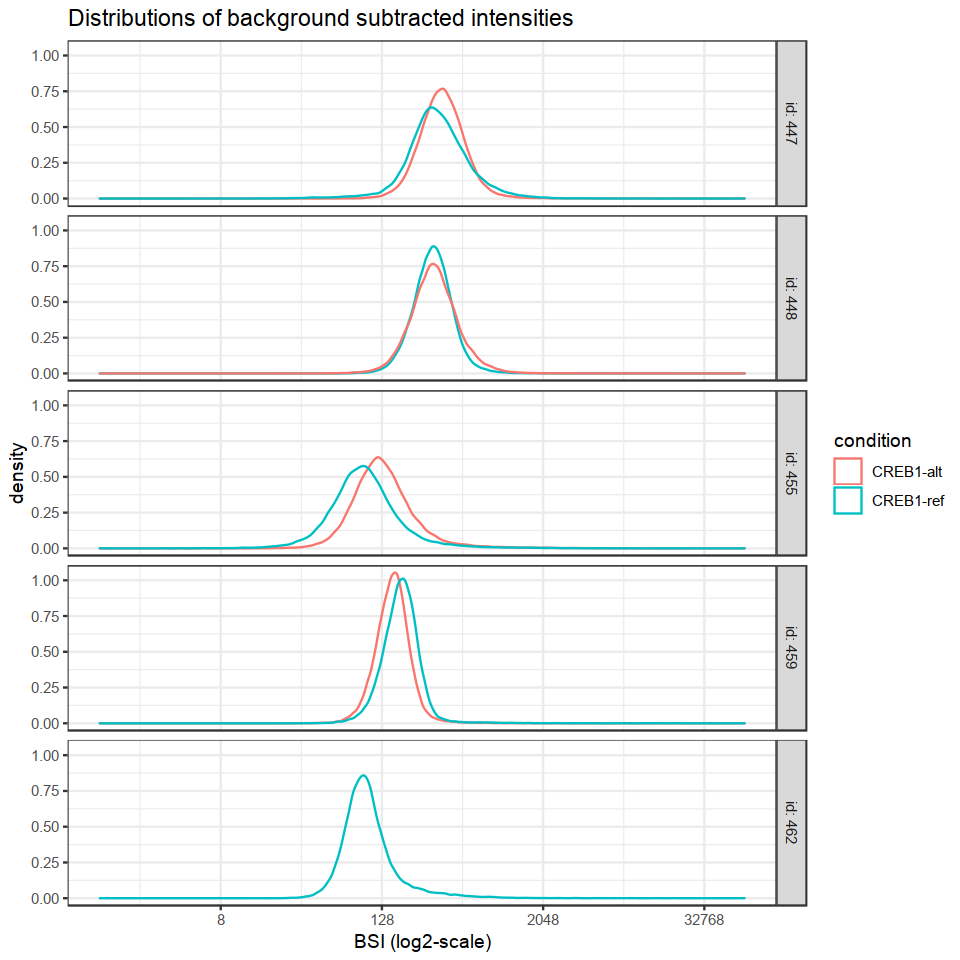

In [29]:
tf_a2 <- broom::tidy(tf_a_pmt, "fore", long = TRUE)

ggplot(tf_a2, aes(x = fore, group = cname, color = condition)) +
    geom_density() +
    scale_x_continuous("BSI (log2-scale)", trans = "log2") + 
    facet_grid(id ~ ., labeller = label_both) + 
    theme_bw() +
    ggtitle("Distributions of background subtracted intensities")

### cy3 normalize

In [30]:
tf_c_e <- cy3FitEmpirical(tf_c, refcy3_8x60k_v1)

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warnin

In [31]:
tf_a_pmt <- cy3Normalize(pe = tf_a_pmt, cy3pe = tf_c_e, match_by = "id_idx")

Warning message in cy3Normalize(pe = tf_a_pmt, cy3pe = tf_c_e, match_by = "id_idx"):
“Dropping samples from cy3pe:
  462_2”


### spatial adjustment

In [32]:
tf_a_pmt <- spatiallyAdjust(tf_a_pmt)

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warnin

### normalize within replicates

In [33]:
tf_a_pmt <- normalizeWithinReplicates(tf_a_pmt)

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”


Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 8524 rows containing non-finite values (stat_density).”


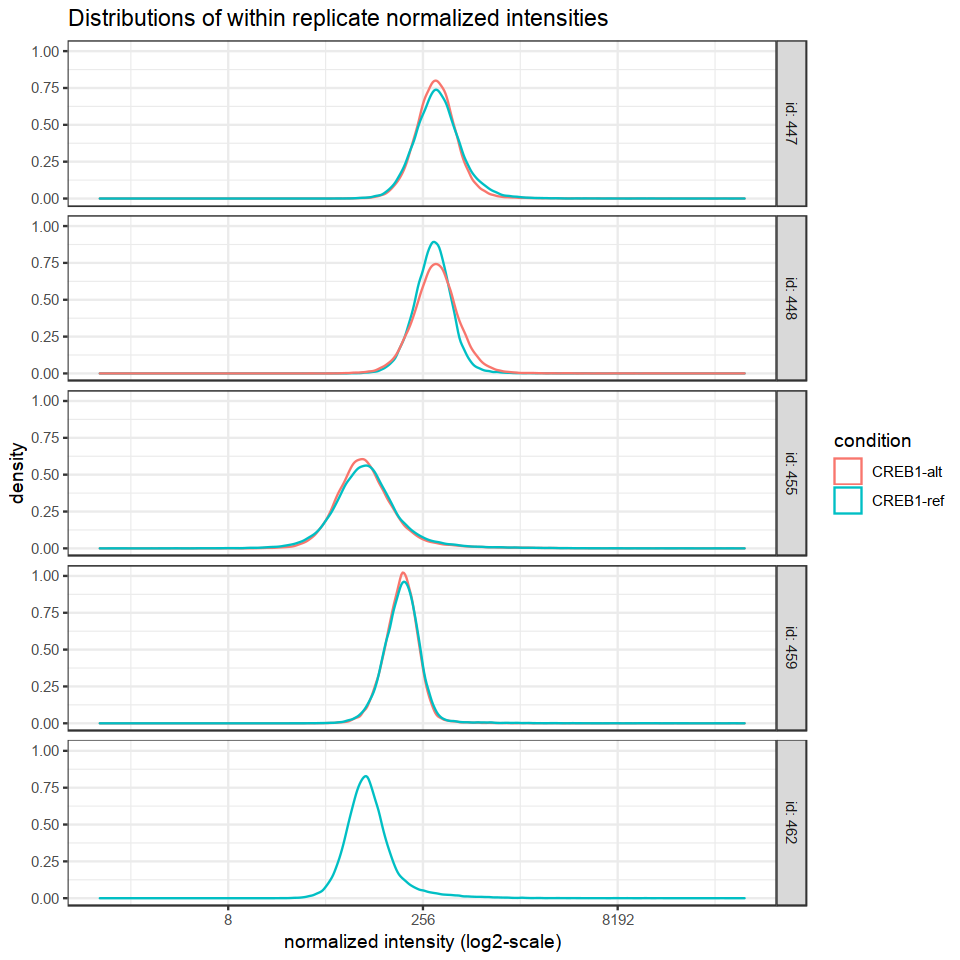

In [34]:
broom::tidy(tf_a_pmt, long = TRUE) %>%
    ggplot(aes(x = normalized, group = cname, color = condition)) +
    geom_density() +
    scale_x_continuous("normalized intensity (log2-scale)", trans = "log2") + 
    facet_grid(id ~ ., labeller = label_both) + 
    theme_bw() +
    ggtitle("Distributions of within replicate normalized intensities")

### normalize across replicates

In [35]:
tf_a_pmt <- normalizeAcrossReplicates(tf_a_pmt)

Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”
Warning message:
“The dim() method for DataFrameList objects is deprecated. Please use
  dims() on these objects instead.”
Warning message:
“The nrow() method for DataFrameList objects is deprecated. Please use
  nrows() on these objects instead.”
Warning message:
“The ncol() method for DataFrameList objects is deprecated. Please use
  ncols() on these objects instead.”


Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 8524 rows containing non-finite values (stat_density).”


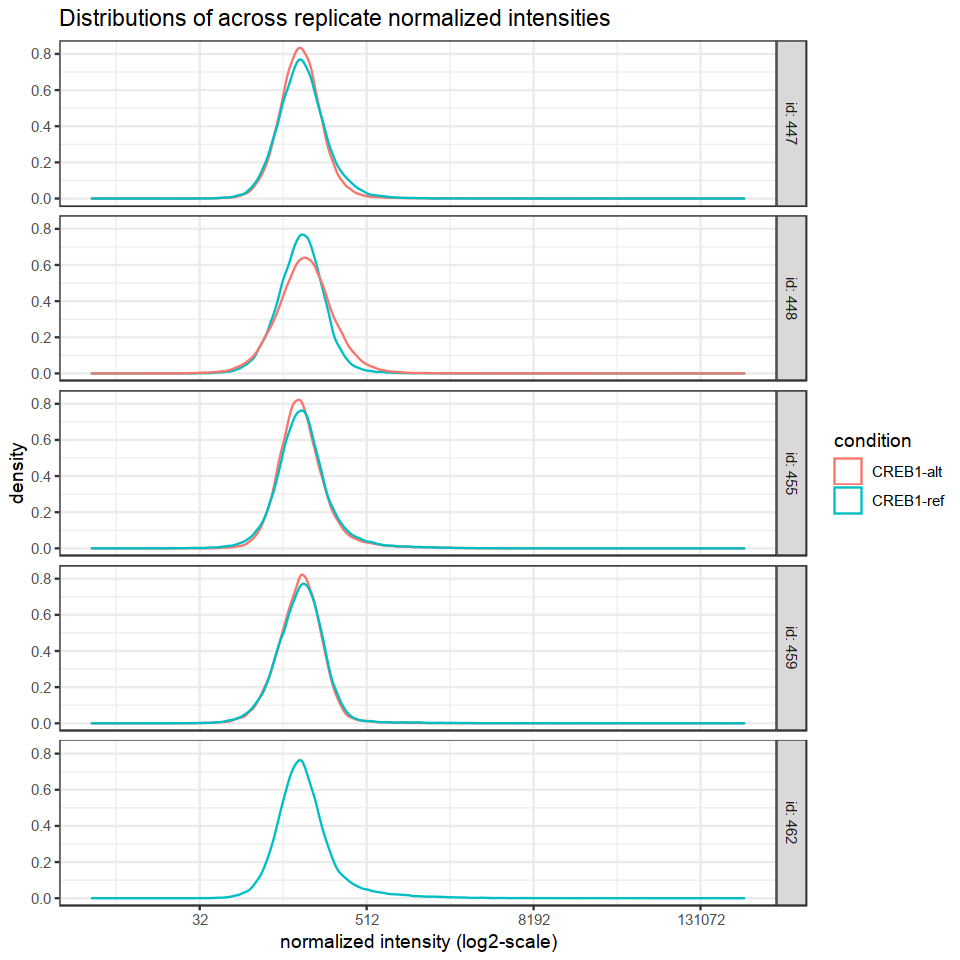

In [36]:
broom::tidy(tf_a_pmt, long = TRUE) %>%
    ggplot(aes(x = normalized, group = cname, color = condition)) +
    geom_density() +
    scale_x_continuous("normalized intensity (log2-scale)", trans = "log2") + 
    facet_grid(id ~ ., labeller = label_both) + 
    theme_bw() +
    ggtitle("Distributions of across replicate normalized intensities")

### write file with processed data for inference

In [38]:
tf_file <- paste0(tf, "-alexa-preprocessed.rds")
saveRDS(tf_a_pmt, file.path("../../../../data/internal/pbms/upbm_processed", tf_file))

## 8. QC: check which probes will be filtered after adjustment

upbm inference will not run if >20% of probes are filtered out

In [39]:
tf_ap_df <- broom::tidy(tf_a_pmt, long = TRUE)

In [41]:
l <- length(unique(tf_ap_df$probeID))

In [42]:
tf_ap_df %>%
    dplyr::group_by(id, condition) %>%
    dplyr::summarize(nna = sum(is.na(normalized)), percent_filtered_out = 100*nna/l) %>%
    dplyr::filter(percent_filtered_out<20) %>%
    dplyr::ungroup() %>%
    print(n = 100)

`summarise()` has grouped output by 'id'. You can override using the `.groups`
argument.


# A tibble: 9 × 4
     id condition   nna percent_filtered_out
  <dbl> <chr>     <int>                <dbl>
1   447 CREB1-alt  3581              8.54   
2   447 CREB1-ref  3563              8.49   
3   448 CREB1-alt     6              0.0143 
4   448 CREB1-ref    11              0.0262 
5   455 CREB1-alt   392              0.935  
6   455 CREB1-ref   424              1.01   
7   459 CREB1-alt    35              0.0834 
8   459 CREB1-ref     4              0.00954
9   462 CREB1-ref   506              1.21   


## 9. 8mer summarization

median among probes by default

In [47]:
tf_file <- paste0(tf, "-alexa-preprocessed8.rds")
tf_ap8 <- summarizeKmers(pe = tf_a_pmt,
                         metrics = "median")
saveRDS(tf_ap8, file.path(file.path("../../../../data/internal/pbms/upbm_processed", tf_file)))

## 10. QC: check replicate correlations once 8mers are summarized

In [48]:
tf_ap8_df <- broom::tidy(tf_ap8, long = TRUE)

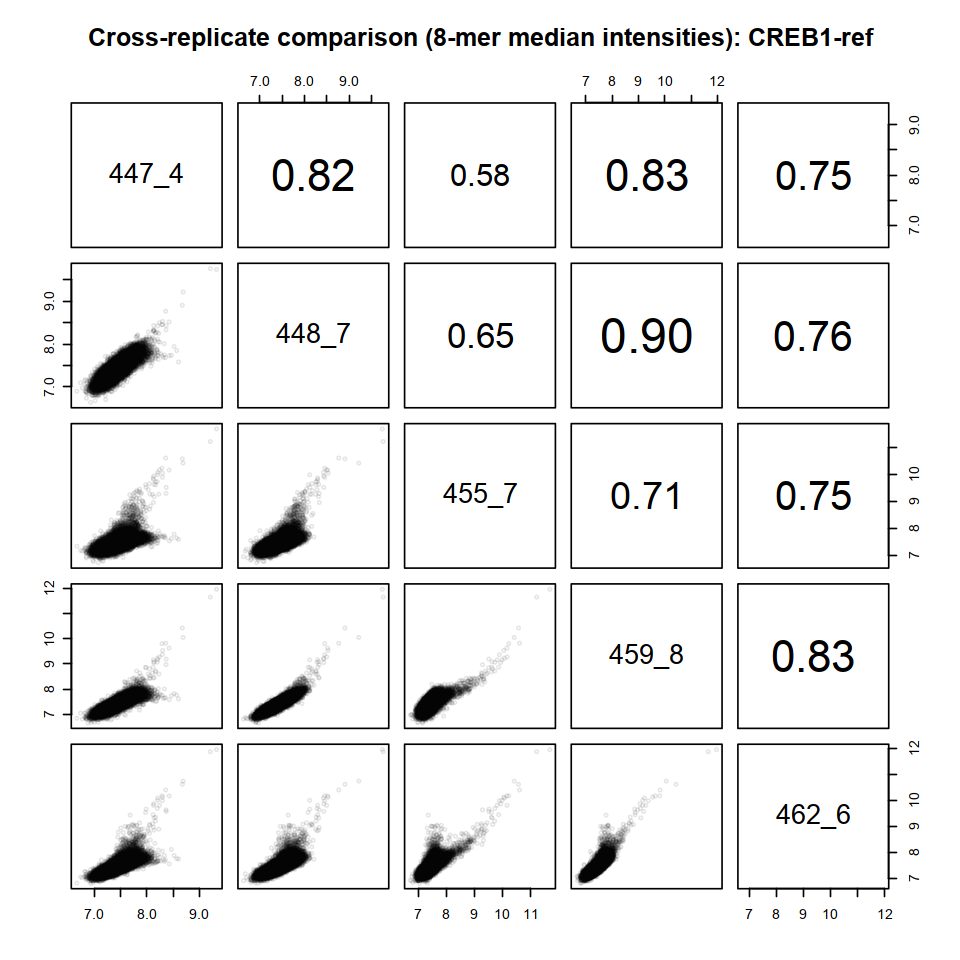

In [49]:
tf_ap8_df %>%
    dplyr::filter(pmt == chosen_pmt) %>%
    dplyr::filter(condition == "CREB1-ref") %>%
    dplyr::select(kmer, condition, id_idx, medianIntensity) %>%
    dplyr::mutate(medianIntensity=log2(medianIntensity)) %>%
    tidyr::spread(id_idx, medianIntensity) %>%
    dplyr::select(-kmer, -condition) %>%
    as.matrix() %>%
    pairs(col = rgb(0, 0, 0, 1/10), cex = .4, upper.panel = panel.cor,
          main = "Cross-replicate comparison (8-mer median intensities): CREB1-ref")

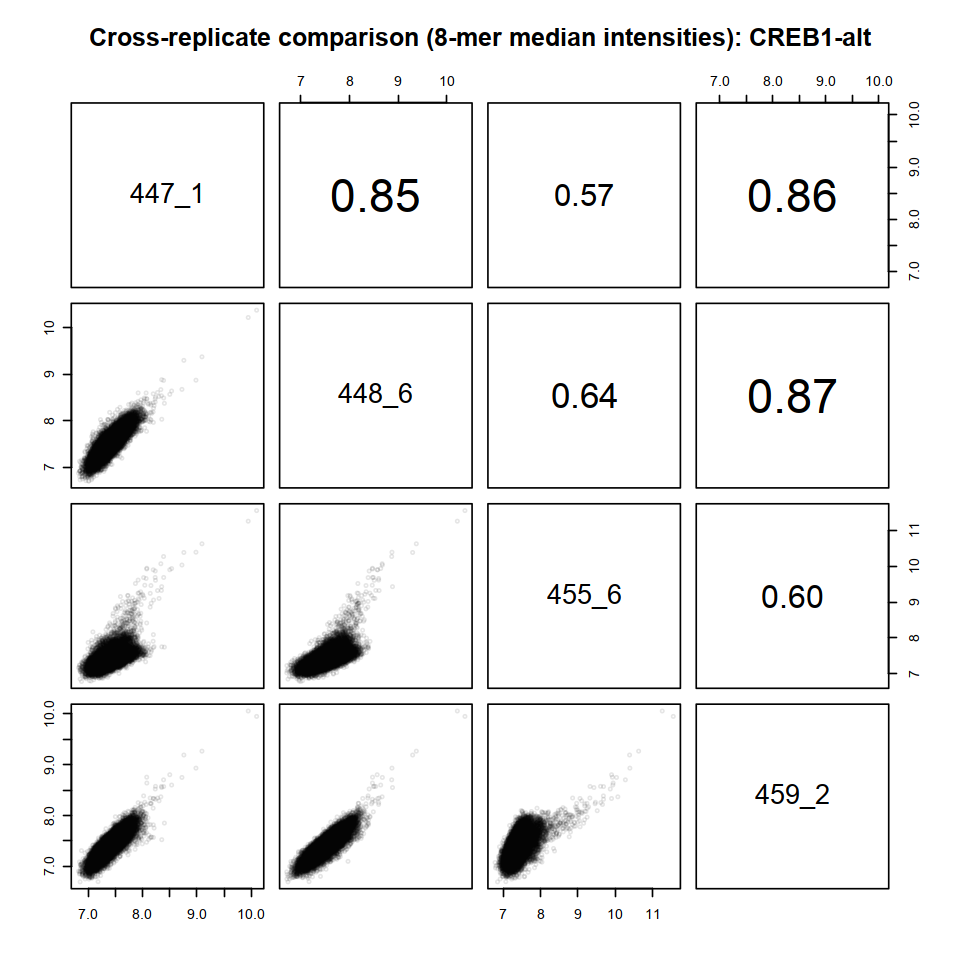

In [50]:
tf_ap8_df %>%
    dplyr::filter(pmt == chosen_pmt) %>%
    dplyr::filter(condition == "CREB1-alt") %>%
    dplyr::select(kmer, condition, id_idx, medianIntensity) %>%
    dplyr::mutate(medianIntensity=log2(medianIntensity)) %>%
    tidyr::spread(id_idx, medianIntensity) %>%
    dplyr::select(-kmer, -condition) %>%
    as.matrix() %>%
    pairs(col = rgb(0, 0, 0, 1/10), cex = .4, upper.panel = panel.cor,
          main = "Cross-replicate comparison (8-mer median intensities): CREB1-alt")

## 11. QC: compare distributions of 8-mers

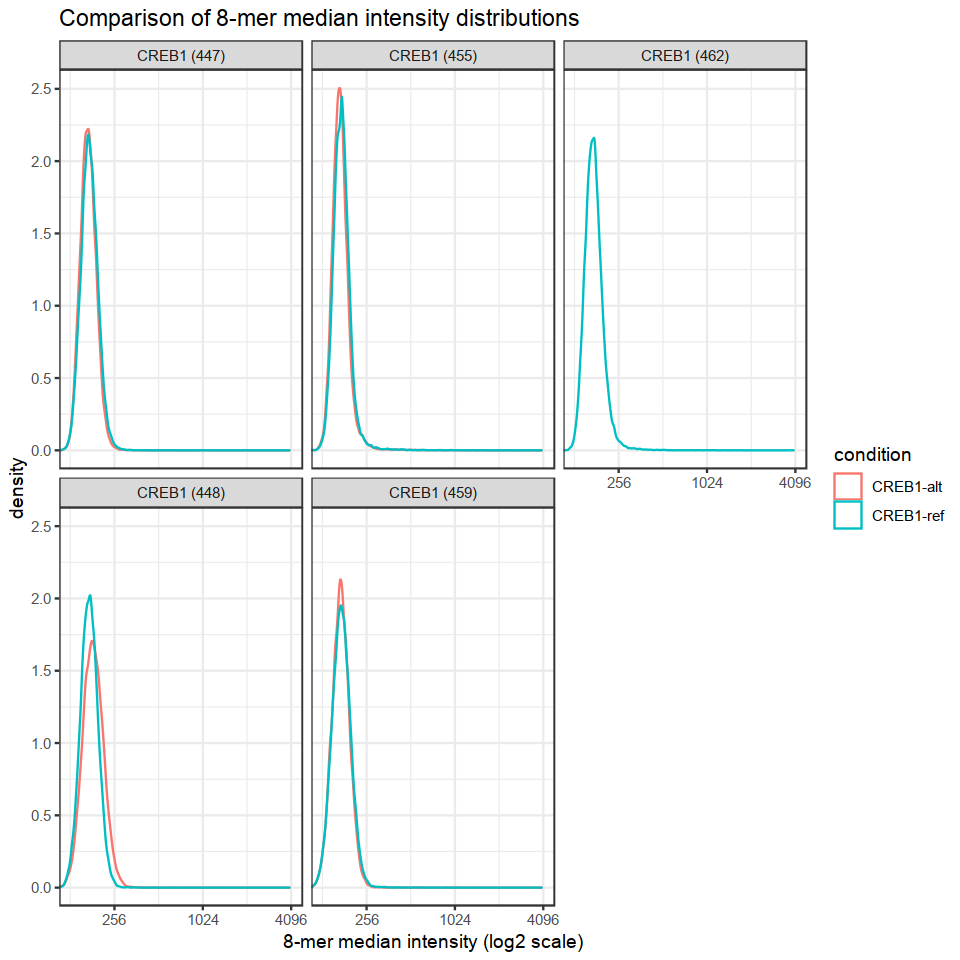

In [51]:
tf_ap8_df %>%
    dplyr::mutate(tf = paste0(tf, " (", id, ")")) %>%
    ggplot(aes(x = medianIntensity)) +
    geom_density(aes(group = condition, color = condition), alpha = 1/2) +
    facet_wrap(~ tf, nrow = 2, dir = 'v') +
    scale_fill_brewer(palette = "Set1") + 
    scale_x_continuous("8-mer median intensity (log2 scale)", trans = "log2") +
    ggtitle("Comparison of 8-mer median intensity distributions") +
    coord_cartesian(xlim = 2^c(7, 12))